In [36]:
# this is basic concept of linear regression
# example is revised from tf-stanford-tutorials
# get a correlation between number of fire, number of theft
# in excel file {x : number of fire}, {y : number of theft}

import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd
import numpy as np

# data file path
DATA_FILE = '02. Linear Regression/data/fire_theft.xls'

# read files from excel sheet (xlrd, numpy)
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

print data

# another approach for testing can be like below
# X = np.linspace(-1, 1, 100)
# Y = X * 3 + np.random.randn(X.shape[0]) * 0.5
# get a loss of model

[[   6.2   29. ]
 [   9.5   44. ]
 [  10.5   36. ]
 [   7.7   37. ]
 [   8.6   53. ]
 [  34.1   68. ]
 [  11.    75. ]
 [   6.9   18. ]
 [   7.3   31. ]
 [  15.1   25. ]
 [  29.1   34. ]
 [   2.2   14. ]
 [   5.7   11. ]
 [   2.    11. ]
 [   2.5   22. ]
 [   4.    16. ]
 [   5.4   27. ]
 [   2.2    9. ]
 [   7.2   29. ]
 [  15.1   30. ]
 [  16.5   40. ]
 [  18.4   32. ]
 [  36.2   41. ]
 [  39.7  147. ]
 [  18.5   22. ]
 [  23.3   29. ]
 [  12.2   46. ]
 [   5.6   23. ]
 [  21.8    4. ]
 [  21.6   31. ]
 [   9.    39. ]
 [   3.6   15. ]
 [   5.    32. ]
 [  28.6   27. ]
 [  17.4   32. ]
 [  11.3   34. ]
 [   3.4   17. ]
 [  11.9   46. ]
 [  10.5   42. ]
 [  10.7   43. ]
 [  10.8   34. ]
 [   4.8   19. ]]


In [40]:
# process placeholder
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# define w,b ( random value )
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

# define hyopthesis
hypothesis = X*w+b

# linear regression cost function & process gradientDescent algorithm
# cost is same meaning of loss ( real value - hypothesis )^2
# GradientDescent algorithm optimizes the cost (almost converge 0)
cost = tf.reduce_mean(tf.square(Y-hypothesis, name="cost"))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [51]:
with tf.Session() as sess:
    
    # TF-VERSION 1.0 CHANGED METHOD
    sess.run(tf.global_variables_initializer()) 
    print 'tensorflow variable, session opened!'
    
    # train the model 100 times
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
            total_loss += l
        print 'Epoch {0}: {1}'.format(i, total_loss / n_samples)
        
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b])
    print 'w : ', w_value
    print "b : ", b_value

tensorflow variable, session opened!
Epoch 0: 2069.6319334
Epoch 1: 2117.0123582
Epoch 2: 2092.302723
Epoch 3: 2068.50804619
Epoch 4: 2045.59118409
Epoch 5: 2023.51464481
Epoch 6: 2002.24476198
Epoch 7: 1981.7483388
Epoch 8: 1961.99444113
Epoch 9: 1942.95201161


Epoch 10: 1924.59308236
Epoch 11: 1906.88988006
Epoch 12: 1889.81645058
Epoch 13: 1873.34713384
Epoch 14: 1857.45884006
Epoch 15: 1842.12787424
Epoch 16: 1827.33249512
Epoch 17: 1813.05205797
Epoch 18: 1799.26608476
Epoch 19: 1785.95621323
Epoch 20: 1773.10248531
Epoch 21: 1760.68912948


Epoch 22: 1748.69841571
Epoch 23: 1737.11386804
Epoch 24: 1725.92087307
Epoch 25: 1715.10462496
Epoch 26: 1704.65009543
Epoch 27: 1694.54471349
Epoch 28: 1684.77463113
Epoch 29: 1675.32845097
Epoch 30: 1666.19353858
Epoch 31: 1657.35840021
Epoch 32: 1648.81226585


Epoch 33: 1640.54407425
Epoch 34: 1632.54468361
Epoch 35: 1624.80433151
Epoch 36: 1617.31268
Epoch 37: 1610.06225325
Epoch 38: 1603.04335572
Epoch 39: 1596.24791761
Epoch 40: 1589.66805633
Epoch 41: 1583.29652426
Epoch 42: 1577.12637129


Epoch 43: 1571.15011906
Epoch 44: 1565.36097915
Epoch 45: 1559.75237808
Epoch 46: 1554.31843646
Epoch 47: 1549.05294696
Epoch 48: 1543.95005999
Epoch 49: 1539.00502821
Epoch 50: 1534.2117978
Epoch 51: 1529.56534989
Epoch 52: 1525.06075912


Epoch 53: 1520.69346485
Epoch 54: 1516.45859351
Epoch 55: 1512.35240239
Epoch 56: 1508.36957801
Epoch 57: 1504.50665881
Epoch 58: 1500.76062691
Epoch 59: 1497.12633656
Epoch 60: 1493.60021089
Epoch 61: 1490.17949913
Epoch 62: 1486.86051453
Epoch 63: 1483.63941993
Epoch 64: 1480.51441864


Epoch 65: 1477.48110657
Epoch 66: 1474.53766605
Epoch 67: 1471.67991767
Epoch 68: 1468.90631556
Epoch 69: 1466.21368803
Epoch 70: 1463.59965632
Epoch 71: 1461.0614087
Epoch 72: 1458.59720884
Epoch 73: 1456.20430697
Epoch 74: 1453.88077248
Epoch 75: 1451.62421839
Epoch 76: 1449.43275321


Epoch 77: 1447.30423202
Epoch 78: 1445.23706862
Epoch 79: 1443.22887268
Epoch 80: 1441.27821302
Epoch 81: 1439.38314222
Epoch 82: 1437.54222492
Epoch 83: 1435.754022
Epoch 84: 1434.01606845
Epoch 85: 1432.32765739
Epoch 86: 1430.68715333
Epoch 87: 1429.09301688
Epoch 88: 1427.54371996


Epoch 89: 1426.03803311
Epoch 90: 1424.57482108
Epoch 91: 1423.15317024
Epoch 92: 1421.77102685
Epoch 93: 1420.42749839
Epoch 94: 1419.12196799
Epoch 95: 1417.85251878
Epoch 96: 1416.61893052
Epoch 97: 1415.41960224
Epoch 98: 1414.25343791
Epoch 99: 1413.1202843
w :  1.71838
b :  15.7892


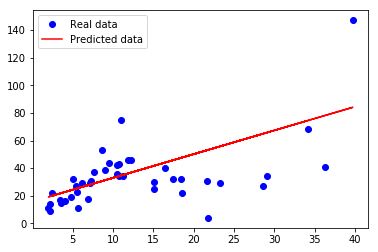

In [52]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()